In [15]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt     
import seaborn as sns
import sys
sys.path.append('..')
from src.utils import *
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import cv2 
import pdb

In [ ]:
path = '/home/dylangoetting/SpatialBenchmark/logs/dynanmic_0806-230209_gemini-1.5-flash'
df = pd.read_pickle(path+'/df_results.pkl')
df.columns

In [ ]:

fig = plt.figure()
ims = []
DIR="/home/dylangoetting/SpatialBenchmark/logs/sucess_dynanmic_0807-000334_gemini-1.5-flash"

for i in range(39):
    # np_img_i = out_image[i].permute(1,2,0).detach().cpu().numpy()
    np_img_i = cv2.imread(os.path.join(DIR,f"iter0/step{i}/image.png"))
    #change bgr to rgb
    np_img_i = cv2.cvtColor(np_img_i, cv2.COLOR_BGR2RGB)

    im = plt.imshow(np_img_i)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1, blit=True)
HTML(ani.to_jshtml())
# ani.save('output.gif', writer='imagemagick')

In [ ]:
plot_trajectory(df)

In [ ]:
df['actions']

In [ ]:
plot_distribution(df, 'confidence')

In [ ]:
line_plot(df, 'distance_to_goal')


In [ ]:
var = df['ground_truth'].var()
print(var)
df['score'] = df['score'].clip(0, 2)
print(df[df['mse'] < var].count()[0]/df.count()[0])
naive_score = (abs(df['ground_truth'].mean() - df['ground_truth'])/df['ground_truth']).mean()
print(df[df['score'] < naive_score].count()[0]/df.count()[0])

In [ ]:
plot_distribution(df, 'tokens_generated')

In [ ]:
plot_distribution(df, 'prediction')

In [ ]:
plot_groupby(df, 'confidence', 'score', std=True)

In [ ]:

plot_groupby(df, 'scene_id', 'score', std=True)

In [ ]:
plot_correlation_scatter(df, 'confidence', 'score')

In [ ]:
plot_correlation_scatter(df, 'ground_truth', 'prediction')

In [50]:

len([f for f in os.listdir('../logs/') if 'EXP' in f])

46

In [55]:
rows = []
files = []
for f in os.listdir('../logs/'):
    if 'EXP' in f:
        row = {}
        try:
            df = pd.read_pickle(f'../logs/{f}/df_results.pkl')
            row.update(df['metadata'].loc[0])
            row['sensors'] = str(row['sensors'])
            # print(np.array(df['agent_location'].loc[:]))
            # raise
            # print(df.loc[0])
            # if 'UPSTAIRS BEDROOM' in f:
            #     row['task'] = 'UPSTAIRS BEDROOM'
            # elif 'KITCHEN SINK' in f:
            #     row['task'] = 'KITCHEN SINK'
            # elif 'DOWNSTAIRS KITCHEN' in f:
            #     row['task'] = 'DOWNSTAIRS KITCHEN'
            # else:
            #     print(f)
            # row['history'] = f[f.index('history')+8:f.index('history')+10]
            # row['arrows'] = type(df['actions'][0]) == np.int64
            # # print(row['arrows'])#df['actions']
            # row['points'] = 1 if 'points_1' in f else 0
            # # print(f)
            # row['font_size'] = f[f.index('font')+9:f.index('font')+12]
            row['group'] = f's={np.round(row["points"], 2)}_c={row["fov"]}'
            # row['mask_thinking'] = 'thinking=True' in f
            # row['prompt_timesteps'] =  'steps=True' in f
            if row['task'] == 'UPSTAIRS BEDROOM':
                #print(max([loc[1] for loc in df['agent_location']]))
                row['sucess'] = max([loc[1] for loc in df['agent_location']]) > -0.05
            elif row['task'] == 'DOWNSTAIRS KITCHEN':
                row['sucess'] = min([loc[1] for loc in df['agent_location']]) < -2.9
                #print(f, min([loc[1] for loc in df['agent_location']]))
            else:
                print(f)
                row['sucess'] = 1 if df['distance_to_goal'].min() < 1.5 else 0

            row['closest'] = max([loc[1] for loc in df['agent_location']])
            if row['sucess']:
                row['time_to_complete'] = df['distance_to_goal'].idxmin()
            else:
                row['time_to_complete'] = 100
            # pdb.set_trace()
            # print(df['actions'] in ['done', 8])
            if row['arrows']:
                row['finished'] = (df['actions'] == 8).idxmax()
            else:
                row['finished'] = (df['actions'] == 'done').idxmax()
            row['name'] = f
            rows.append(row)
            files.append(f)
        except:
            pass
df = pd.DataFrame(rows)


In [59]:
df

,task,history,points,fontsize,arrows,consistency,mask_thinking,add_timesteps_prompt,random_spawn,sensors,fov,group,sucess,closest,time_to_complete,finished,name
0,UPSTAIRS BEDROOM,0,-1.520000,1.9,True,1,True,True,True,"[1.3, 0, -1.3]",115,s=-1.52_c=115,True,0.224675,26,0,EXP_0814-214204_gemini-1.5-flash
1,UPSTAIRS BEDROOM,0,-1.520000,1.9,True,1,True,True,True,"[1.3, 0, -1.3]",115,s=-1.52_c=115,True,0.024675,17,0,EXP_0814-210228_gemini-1.5-flash
2,UPSTAIRS BEDROOM,0,-1.520000,1.9,True,1,True,True,True,"[1.3, 0, -1.3]",115,s=-1.52_c=115,True,0.224675,17,0,EXP_0814-213207_gemini-1.5-flash
3,UPSTAIRS BEDROOM,0,-2.280000,1.9,True,1,True,True,True,"[1.52, 0, -1.52]",135,s=-2.28_c=135,False,-1.263501,100,0,EXP_0814-210549_gemini-1.5-flash
4,UPSTAIRS BEDROOM,0,-2.280000,1.9,True,1,True,True,True,"[1.52, 0, -1.52]",135,s=-2.28_c=135,False,-1.410323,100,0,EXP_0814-205541_gemini-1.5-flash
5,UPSTAIRS BEDROOM,5,-1.319469,1.9,True,1,True,True,True,[0],135,s=-1.32_c=135,False,-1.175325,100,0,EXP_0814-224148_gemini-1.5-flash
6,UPSTAIRS BEDROOM,0,-2.280000,1.9,True,1,True,True,True,"[1.52, 0, -1.52]",135,s=-2.28_c=135,False,-1.320565,100,0,EXP_0814-211541_gemini-1.5-flash
7,UPSTAIRS BEDROOM,0,-2.280000,1.9,True,1,True,True,True,"[1.3, 0, -1.3]",115,s=-2.28_c=115,False,-1.166681,100,0,EXP_0814-202009_gemini-1.5-flash
8,UPSTAIRS BEDROOM,5,-1.319469,1.9,True,1,True,True,True,[0],135,s=-1.32_c=135,True,0.024675,17,0,EXP_0814-222748_gemini-1.5-flash
9,UPSTAIRS BEDROOM,0,-2.280000,1.9,True,1,True,True,True,"[1.3, 0, -1.3]",115,s=-2.28_c=115,False,-1.179848,100,0,EXP_0814-213846_gemini-1.5-flash


In [60]:
# df.loc[29]?
df['sucess'].mean()

0.4782608695652174

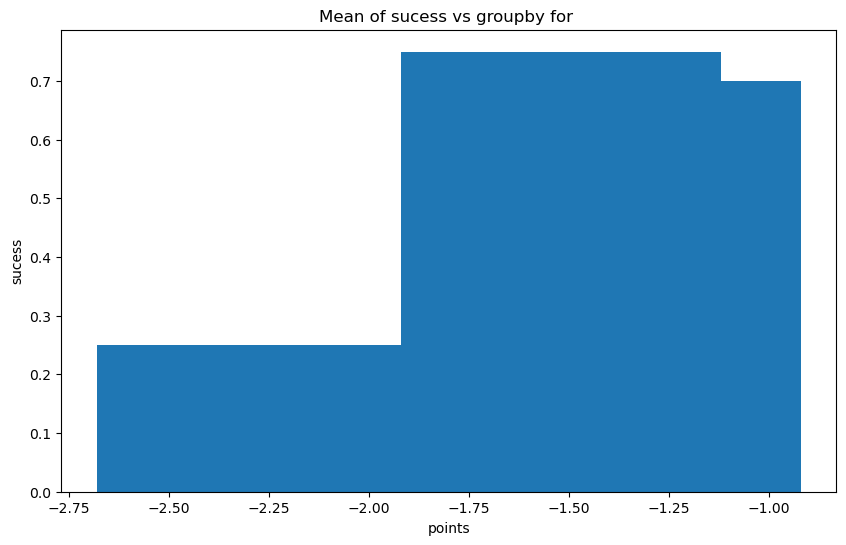

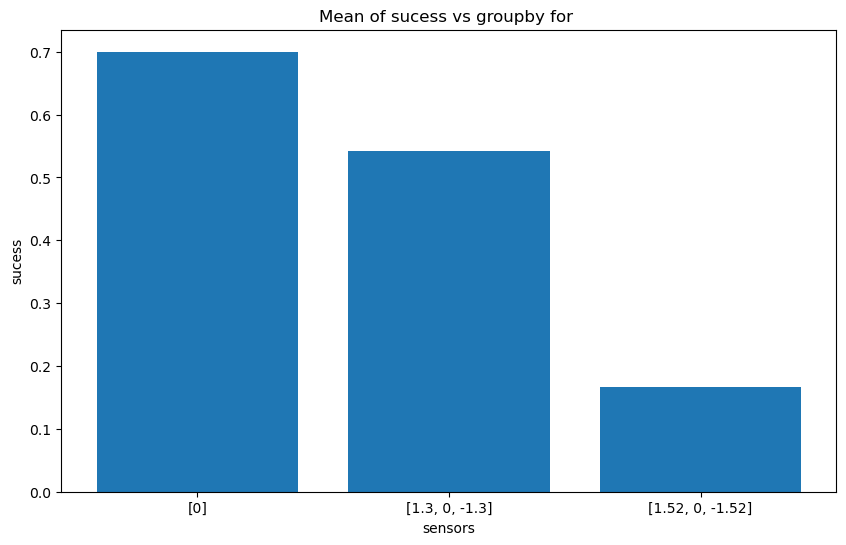

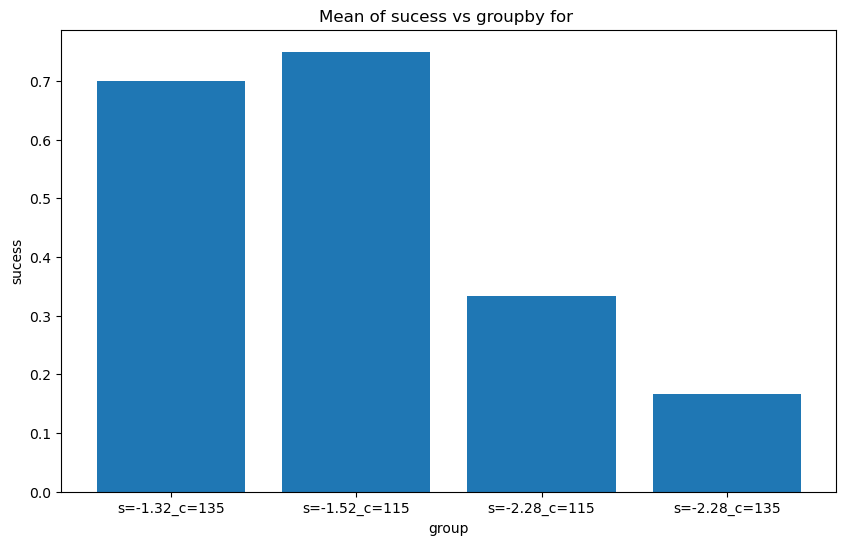

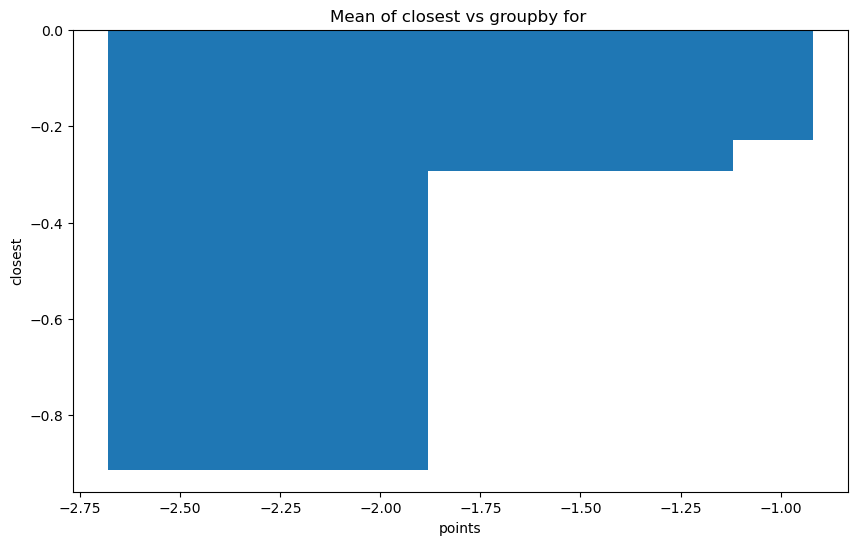

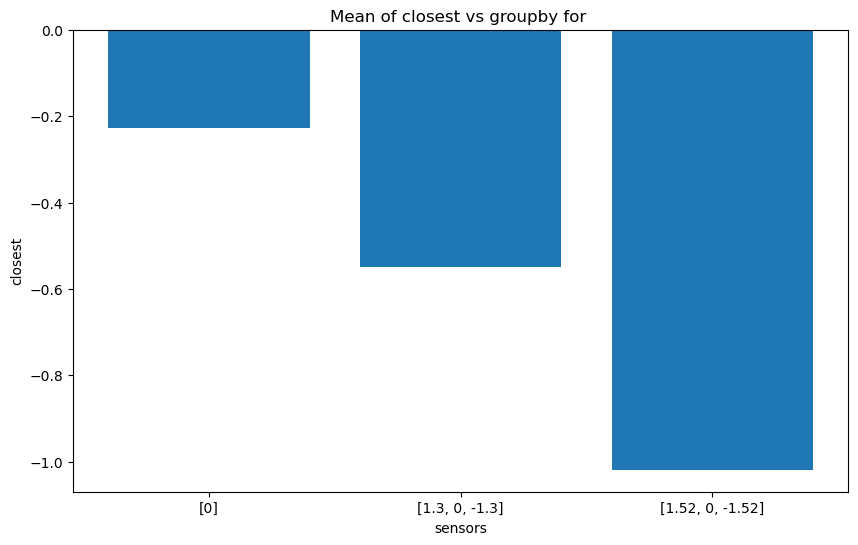

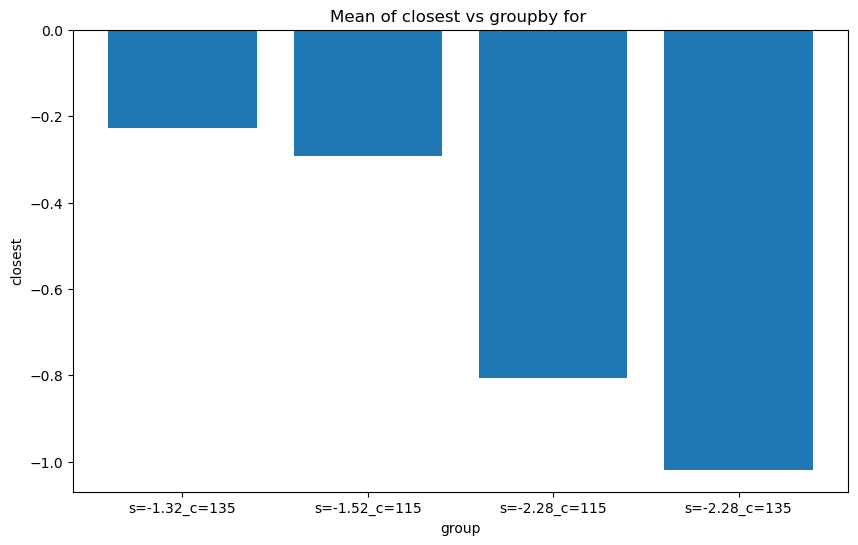

group
s=-1.32_c=135    10
s=-1.52_c=115    12
s=-2.28_c=115    12
s=-2.28_c=135    12
Name: sucess, dtype: int64

In [61]:
vs = ['sucess', 'closest']
groups = ['points', 'sensors', 'group']

for var in vs:
    for group in groups:
        plot_groupby(df, group, var, std=False)

#plot_groupby(df[df['task']=='KITCHEN SINK'], 'group', 'closest', std=False, title='KITCHEN')
# plot_groupby(df[df['task']=='UPSTAIRS BEDROOM'], 'group', 'closest', std=False, title='UPSTAIRS')
# plot_groupby(df[df['task']=='FIREPLACE'], 'group', 'closest', std=False, title='FIREPLACE')
# plot_groupby(df, 'task', 'sucess', std=False)
#df[df['points']==1].groupby('font_size')['sucess'].mean()
df.groupby('group')['sucess'].count()

In [15]:
files[56]

'EXP_0814-102244_gemini-1.5-flash'

In [13]:
df.sort_values('closest')

,task,history,points,fontsize,arrows,consistency,mask_thinking,add_timesteps_prompt,random_spawn,sensors,group,sucess,closest,time_to_complete,finished
82,DOWNSTAIRS KITCHEN,0,-2.280000,1.9,True,2,True,True,True,"[1.52, 0, -1.52]","s=[1.52, 0, -1.52]_c=2",True,-2.975325,17,0
56,DOWNSTAIRS KITCHEN,0,-2.280000,1.9,True,1,True,True,True,"[1.52, 0, -1.52]","s=[1.52, 0, -1.52]_c=1",True,-2.975325,10,0
94,DOWNSTAIRS KITCHEN,0,-2.280000,1.9,True,2,True,True,True,"[1.52, 0, -1.52]","s=[1.52, 0, -1.52]_c=2",True,-2.975325,21,0
71,DOWNSTAIRS KITCHEN,0,-2.280000,1.9,True,2,True,True,True,"[1.52, 0, -1.52]","s=[1.52, 0, -1.52]_c=2",True,-2.975325,19,0
7,DOWNSTAIRS KITCHEN,5,-1.319469,1.9,True,1,True,True,True,[0],s=[0]_c=1,True,-2.975325,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,DOWNSTAIRS KITCHEN,0,-1.860000,1.9,True,2,True,True,True,"[1.24, 0, -1.24]","s=[1.24, 0, -1.24]_c=2",False,0.024675,100,0
38,DOWNSTAIRS KITCHEN,5,-1.319469,1.9,True,2,True,True,True,[0],s=[0]_c=2,False,0.024675,100,0
37,DOWNSTAIRS KITCHEN,5,-1.319469,1.9,True,2,True,True,True,[0],s=[0]_c=2,False,0.024675,100,0
46,DOWNSTAIRS KITCHEN,0,-2.280000,1.9,True,1,True,True,True,"[1.52, 0, -1.52]","s=[1.52, 0, -1.52]_c=1",False,0.024675,100,0


In [ ]:
from regex import D


fig = plt.figure()
ims = []
DIR="/home/dylangoetting/SpatialBenchmark/logs/" + files[20]

for i in range(len(os.listdir(DIR + '/iter0'))):
    # np_img_i = out_image[i].permute(1,2,0).detach().cpu().numpy()
    np_img_i = cv2.imread(os.path.join(DIR,f"iter0/step{i}/image.png"))
    #change bgr to rgb
    np_img_i = cv2.cvtColor(np_img_i, cv2.COLOR_BGR2RGB)

    im = plt.imshow(np_img_i)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1, blit=True)
HTML(ani.to_jshtml())

In [ ]:
files[29]

In [ ]:

# Filter data for tasks UPSTAIRS and KITCHEN SINK
tasks = ["UPSTAIRS BEDROOM", "KITCHEN SINK"]
filtered_df = df[df['task'].isin(tasks)]

# Group by task, mask_thinking, and history, then calculate mean of closest
grouped_df = filtered_df.groupby(['task', 'mask_thinking', 'history', 'prompt_timesteps'])['closest'].mean().reset_index()

# Plot for each task
for task in tasks:
    task_df = grouped_df[grouped_df['task'] == task]
    task_df['combo'] = task_df[['mask_thinking', 'history', 'prompt_timesteps']].apply(lambda x: f"{x[0]} & {x[1]} & timesteps{x[2]}", axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.bar(task_df['combo'], task_df['closest'])
    plt.title(f'Mean of Closest for Task: {task}')
    plt.xlabel('Combination of Mask Thinking and History')
    plt.ylabel('Mean of Closest')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
